Purpose of this notebook is to conduct EDA on Credit Card Fraud dataset before modeling 

Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Imports 

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

## Data

In [3]:
df = pd.read_parquet('creditcard.parquet')

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
df.dtypes

Time         float64
V1           float64
V2           float64
V3           float64
V4           float64
V5           float64
V6           float64
V7           float64
V8           float64
V9           float64
V10          float64
V11          float64
V12          float64
V13          float64
V14          float64
V15          float64
V16          float64
V17          float64
V18          float64
V19          float64
V20          float64
V21          float64
V22          float64
V23          float64
V24          float64
V25          float64
V26          float64
V27          float64
V28          float64
Amount       float64
Class          int64
Time_Min       int64
Time_Hour      int64
dtype: object

## Visuals 

#### Target Feature Count

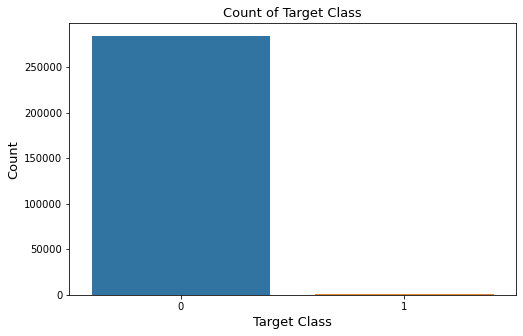

In [7]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'Class', data = df)
plt.title('Count of Target Class', fontsize=13)
plt.xlabel('Target Class', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

#### Target Feature with Amount

/opt/anaconda3/envs/tf_torch/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


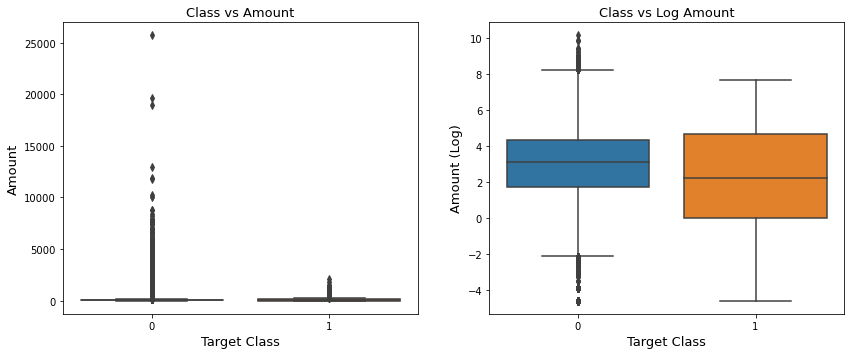

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(121)
ax = sns.boxplot(x = "Class",y= "Amount", data = df)
ax.set_title("Class vs Amount", fontsize=13)
ax.set_xlabel("Target Class", fontsize=13)
ax.set_ylabel("Amount", fontsize = 13)

plt.subplot(122)
ax1 = sns.boxplot(x = df.Class,y = np.log(df.Amount))
ax1.set_title("Class vs Log Amount", fontsize=13)
ax1.set_xlabel("Target Class", fontsize=13)
ax1.set_ylabel("Amount (Log)", fontsize = 13)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

#### Fraud by Time

In [22]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_Min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_Hour'] = (timedelta.dt.components.hours).astype(int)

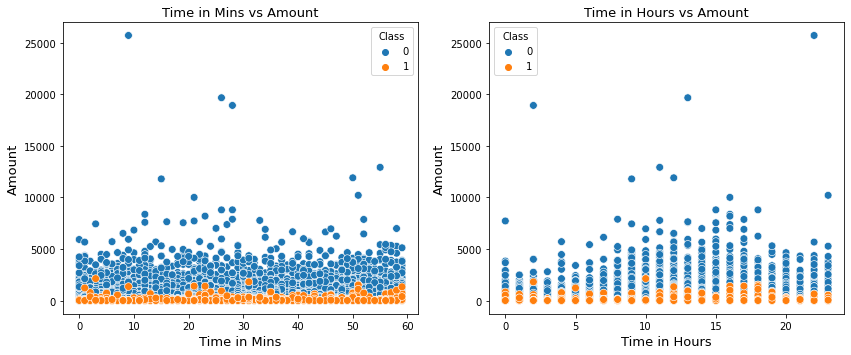

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(121)
ax = sns.scatterplot(y = "Amount", x = "Time_Min", data = df.sort_values('Class'), hue = 'Class', s = 60)
ax.set_title("Time in Mins vs Amount", fontsize=13)
ax.set_xlabel("Time in Mins", fontsize=13)
ax.set_ylabel("Amount", fontsize = 13)

plt.subplot(122)
ax1 = sns.scatterplot(y = "Amount", x = "Time_Hour", data = df.sort_values('Class'), hue = 'Class', s = 60)
ax1.set_title("Time in Hours vs Amount", fontsize=13)
ax1.set_xlabel("Time in Hours", fontsize=13)
ax1.set_ylabel("Amount", fontsize = 13)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

#plt.show()

#### Dist of all Features

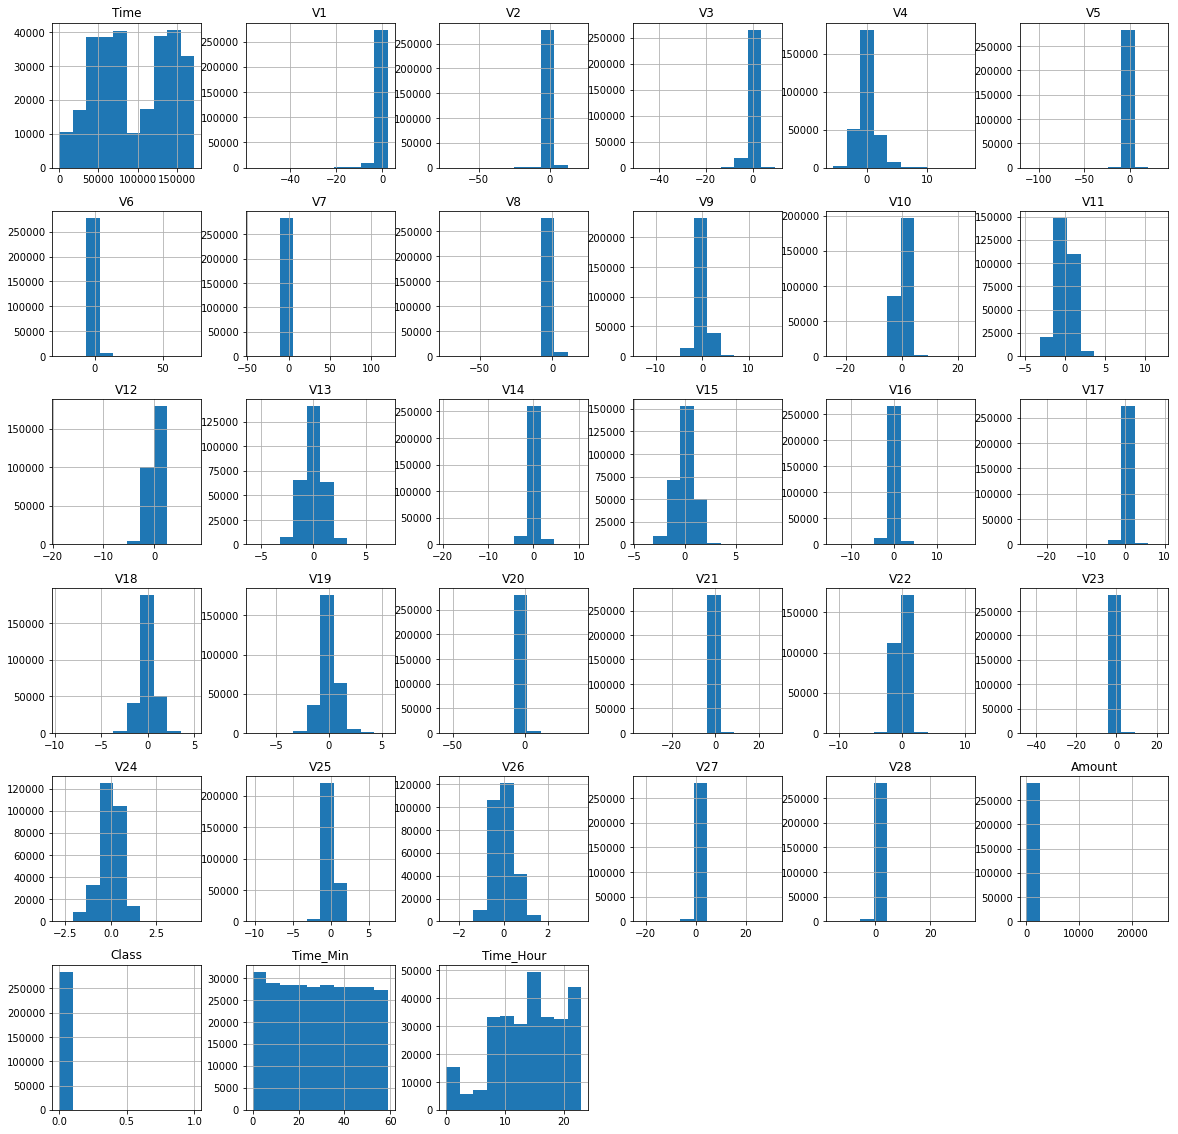

In [24]:
df.hist(figsize=(20,20))
plt.show()